In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a CSV file into a DataFrame
combined_1stBatch = pd.read_csv('../combined_and_clean_data/1stBatch_Combined.csv')
combined_2ndBatch = pd.read_csv('../combined_and_clean_data/2ndBatch_Combined.csv')

# For the 2ndBatch, copy the 'Student ID' to the 'GED_ID' column
combined_2ndBatch['GED -ID'] = combined_2ndBatch['Student ID']

# Combine both batches
combined_All_batch = pd.concat([combined_1stBatch, combined_2ndBatch], ignore_index=True)

# Combine 'Remark' and 'Remarks' columns
combined_All_batch['Combined_Remark'] = combined_All_batch['Remark'].fillna('') + ' ' + combined_All_batch['Remarks'].fillna('')

# Clean up extra spaces
combined_All_batch['Combined_Remark'] = combined_All_batch['Combined_Remark'].str.strip()

# Drop the original columns if we don't need them anymore
combined_All_batch = combined_All_batch.drop(['Remark', 'Remarks'], axis=1)
combined_All_batch = combined_All_batch.drop(columns=['Student ID'])
combined_All_batch = combined_All_batch.drop(columns=['Sr. Num'])

# Fill all missing values in the DataFrame with 'unknown'
combined_All_batch = combined_All_batch.fillna('unknown')



In [13]:
# print(combined_All_batch)
# combined_All_batch.to_csv('../combined_and_clean_data/combined_All_batch_participants.csv', index=False)

# 1. Get an overview of the demographic composition for all batch

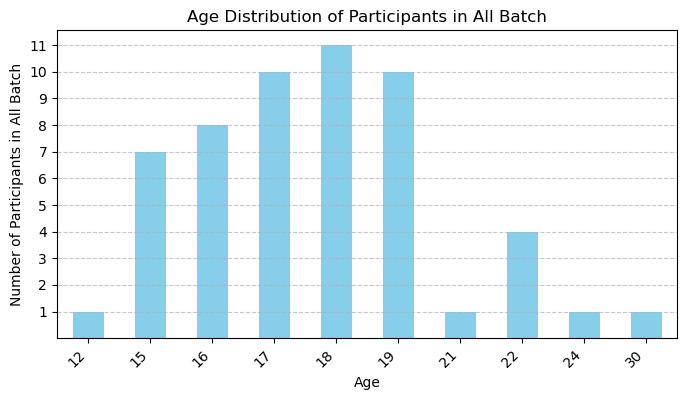

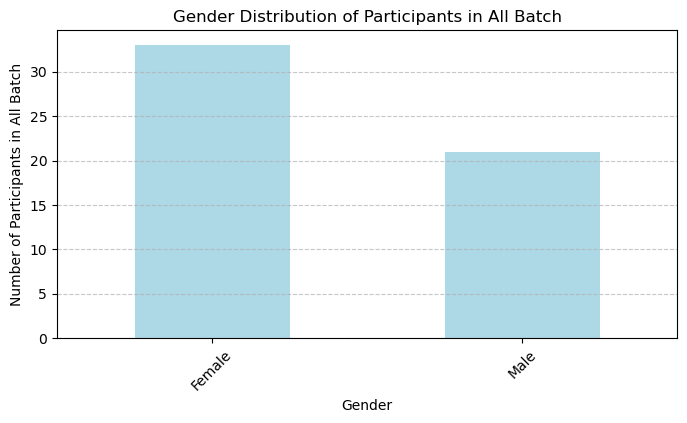

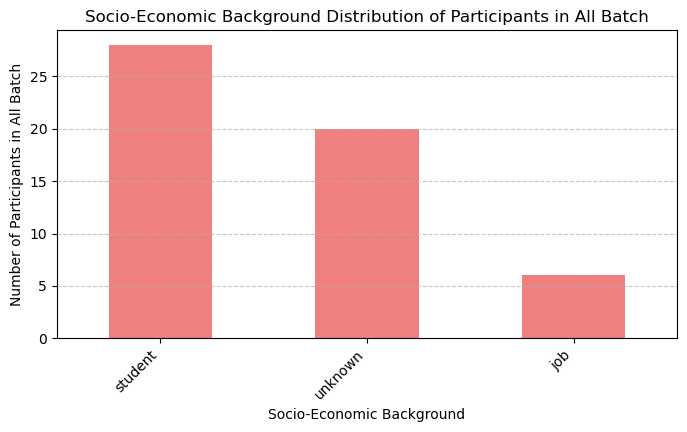

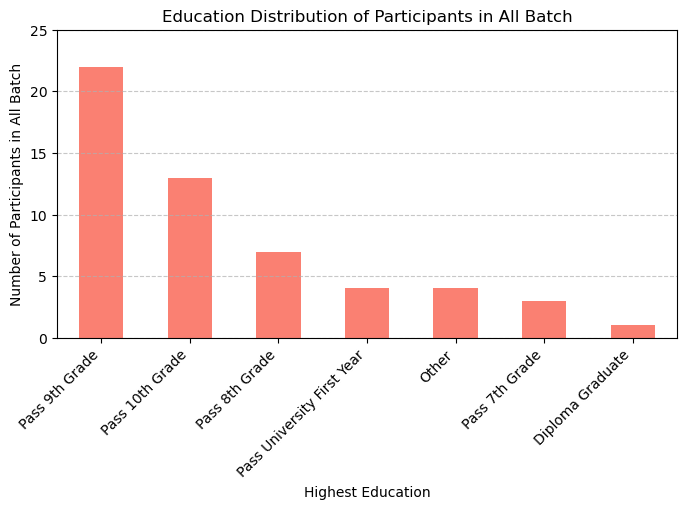

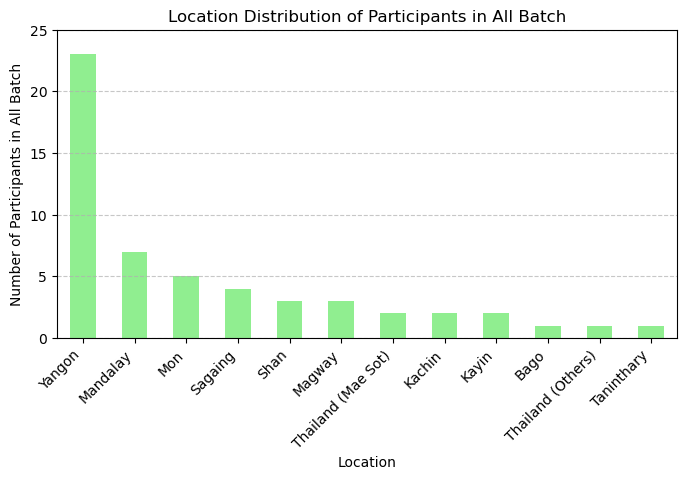

In [14]:
# 1. Plot Age Distribution
# Convert 'Age' column to numeric, forcing errors to NaN and filling with a default value (if needed)
combined_All_batch['Age'] = pd.to_numeric(combined_All_batch['Age'], errors='coerce').fillna(0).astype(int)

# 1. Plot Age Distribution
plt.figure(figsize=(8, 4))
combined_All_batch['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Distribution of Participants in All Batch')
plt.xlabel('Age')
plt.ylabel('Number of Participants in All Batch')
plt.yticks([1, 2, 3, 4,5,6,7,8,9,10,11])  # Show only whole numbers on the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Plot Gender Distribution
plt.figure(figsize=(8, 4))
combined_All_batch['Gender'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gender Distribution of Participants in All Batch')
plt.xlabel('Gender')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='center')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Plot Socio-Economic Background Distribution
plt.figure(figsize=(8, 4))
combined_All_batch['Socio-economic background'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Socio-Economic Background Distribution of Participants in All Batch')
plt.xlabel('Socio-Economic Background')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Plot Education Distribution
plt.figure(figsize=(8, 4))
combined_All_batch['Highest Education'].value_counts().plot(kind='bar', color='salmon')
plt.title('Education Distribution of Participants in All Batch')
plt.xlabel('Highest Education')
plt.ylabel('Number of Participants in All Batch')
plt.yticks([0,5,10,15,20,25])  
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 5. Plot Location Distribution
plt.figure(figsize=(8, 4))
combined_All_batch['Location'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Location Distribution of Participants in All Batch')
plt.xlabel('Location')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.yticks([0,5,10,15,20,25])  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Commitment and engagement for batch 1 and 2

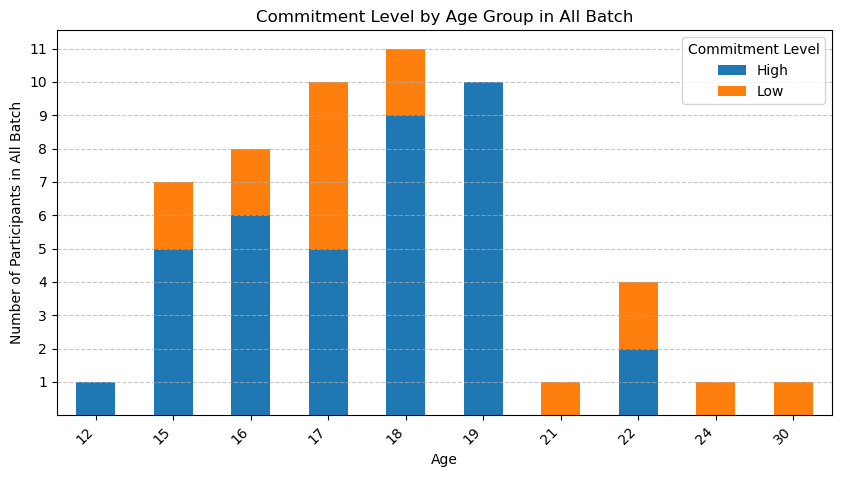

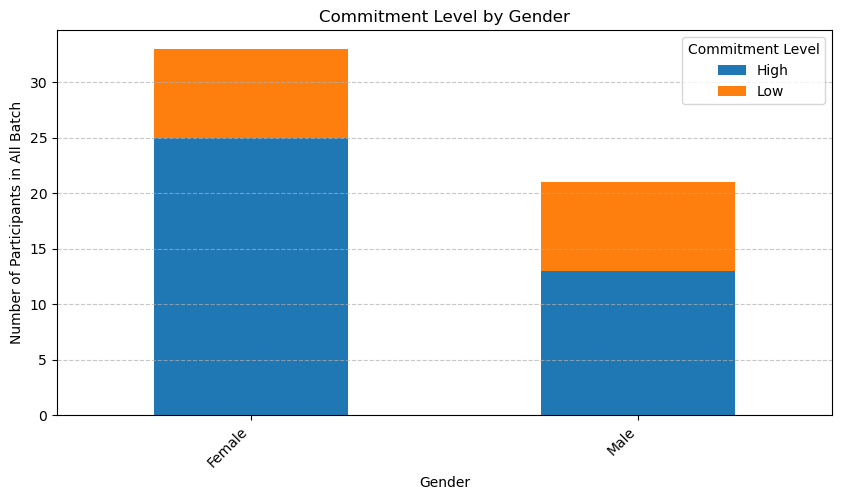

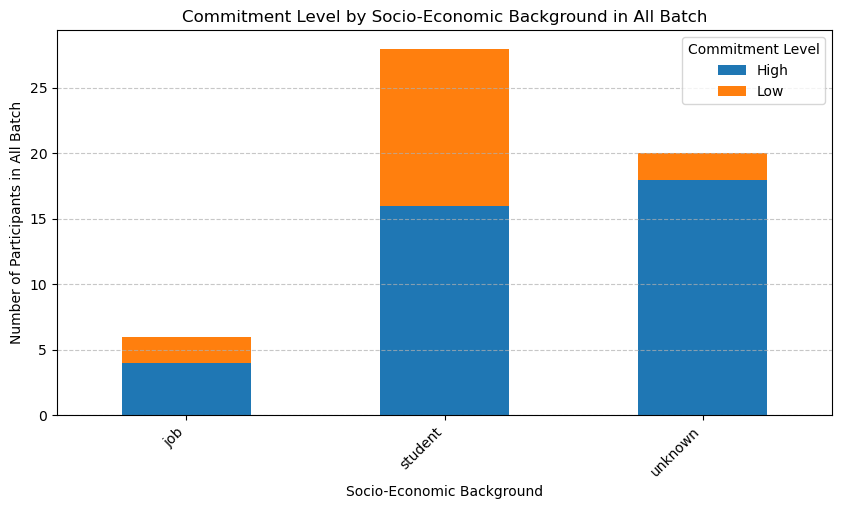

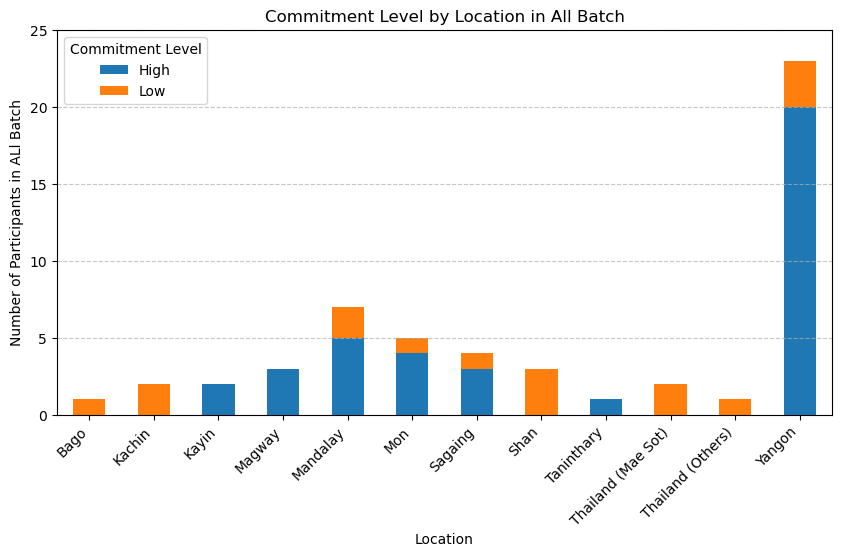

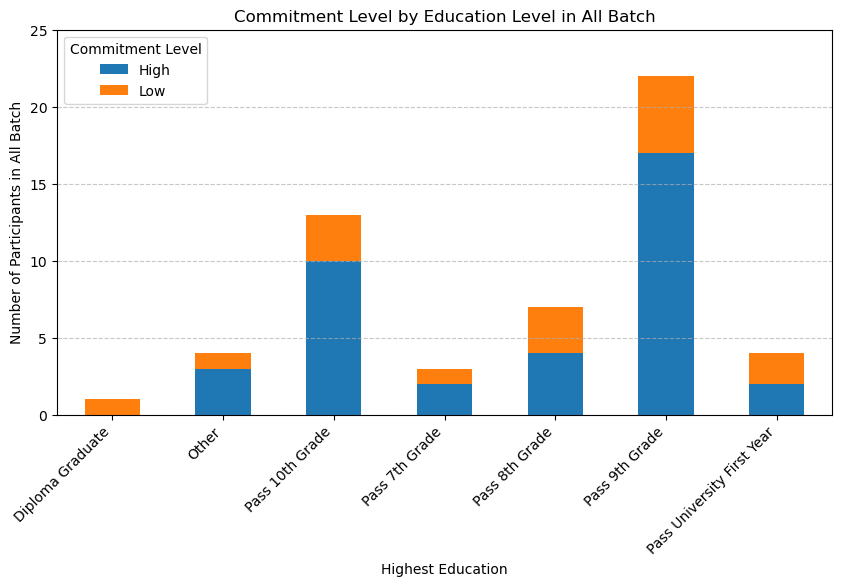

In [15]:


# Step 1: Define a function to categorize commitment
def categorize_commitment(remarks):
    if remarks == 'Drop out' or remarks == 'Drop Out' or remarks == 'Drop':
        return 'Low'  # 'Drop' indicates low commitment
    else:
        return 'High'  # All other remarks indicate high commitment

# Step 2: Create a new 'Commitment' column
combined_All_batch['Commitment'] = combined_All_batch['Combined_Remark'].apply(categorize_commitment)

# Analyze Commitment by Age Group
commitment_by_age = combined_All_batch.groupby('Age')['Commitment'].value_counts().unstack().fillna(0)
commitment_by_age.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Commitment Level by Age Group in All Batch')
plt.xlabel('Age')
plt.ylabel('Number of Participants in All Batch')
plt.yticks([1, 2, 3, 4,5,6,7,8,9,10,11])  # Show only whole numbers on the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Commitment Level')
plt.show()

# Analyze Commitment by Gender
commitment_by_gender = combined_All_batch.groupby('Gender')['Commitment'].value_counts().unstack().fillna(0)
commitment_by_gender.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Commitment Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Commitment Level')
plt.show()


# Analyze Commitment by Socio-Economic Background
commitment_by_socio = combined_All_batch.groupby('Socio-economic background')['Commitment'].value_counts().unstack().fillna(0)
commitment_by_socio.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Commitment Level by Socio-Economic Background in All Batch')
plt.xlabel('Socio-Economic Background')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Commitment Level')
plt.show()

# Analyze Commitment by Location
commitment_by_location = combined_All_batch.groupby('Location')['Commitment'].value_counts().unstack().fillna(0)
commitment_by_location.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Commitment Level by Location in All Batch')
plt.xlabel('Location')
plt.ylabel('Number of Participants in ALl Batch')
plt.xticks(rotation=45, ha='right')
plt.yticks([0,5,10,15,20,25])  # Show only whole numbers on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Commitment Level')
plt.show()

# Analyze Commitment by Highest Education Level
commitment_by_education = combined_All_batch.groupby('Highest Education')['Commitment'].value_counts().unstack().fillna(0)
commitment_by_education.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Commitment Level by Education Level in All Batch')
plt.xlabel('Highest Education')
plt.ylabel('Number of Participants in All Batch')
plt.xticks(rotation=45, ha='right')
plt.yticks([0,5,10,15,20,25])  # Show only whole numbers on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Commitment Level')
plt.show()